# Traditional ARIMA Model for doing prediction

One of the state is chosen and data is retrieved for the same and the data 
is made stationary by removing trend and seasonal variation. Futher analysis
is done and prediction is done using ARIMA

In [1]:
#import numpy and pandas package
import numpy as np
import pandas as pd

#import matplot lib for plotting and let the plotting be inline
%matplotlib inline
import matplotlib.pyplot as plt


#during report generation ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read all the records to MonthlyDeptdatafile. 
#Please note all the delimiter are "^" as delimiters of ";","&" etc will possibly be in comments
data=pd.read_csv("MonthlyDeptdatafile.csv", sep='^')

In [3]:
#Group records by org_name and take one group
grouped=data.groupby('org_name')

#for name,group in grouped:
#   print(name)

dept_dataframe=grouped.get_group('Government of Karnataka')


In [4]:
# Compute auto correlation and partial auto correlation

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(dept_dataframe.Recetpts, nlags = 20)
lag_pacf = pacf(dept_dataframe.Recetpts, nlags = 20)

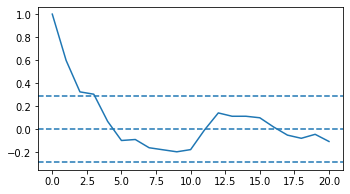

In [5]:
# Plot the auto correlation. This is needed to get q

plt.rcParams['figure.figsize'] = [12, 3]
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(dept_dataframe.Recetpts)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(dept_dataframe.Recetpts)),linestyle='--')

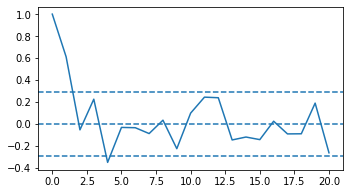

In [6]:
# Plot the partial auto correlation. This is needed to get 0

plt.subplot(121) 
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(dept_dataframe.Recetpts)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(dept_dataframe.Recetpts)),linestyle='--')

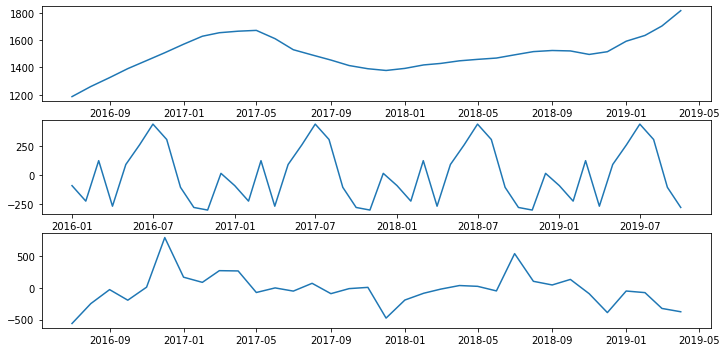

In [7]:
# Decompose the data to trend, seasonal and residual data

from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = [12, 8]
decomposition=seasonal_decompose(dept_dataframe.Recetpts,freq=12)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(411)
plt.plot(pd.to_datetime((dept_dataframe.Year*100+dept_dataframe.Month).apply(str),format='%Y%m'),trend)
plt.subplot(412)
plt.plot(pd.to_datetime((dept_dataframe.Year*100+dept_dataframe.Month).apply(str),format='%Y%m'),seasonal)
plt.subplot(413)
plt.plot(pd.to_datetime((dept_dataframe.Year*100+dept_dataframe.Month).apply(str),format='%Y%m'),residual)

In [8]:

#Compute the Dickey-Fuller test to check statuinarity of data using p-value and comparing critical values with ADF statistics

from statsmodels.tsa.stattools import adfuller
X = dept_dataframe.Recetpts.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.966097
p-value: 0.038184
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602


/home/rajaneesh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


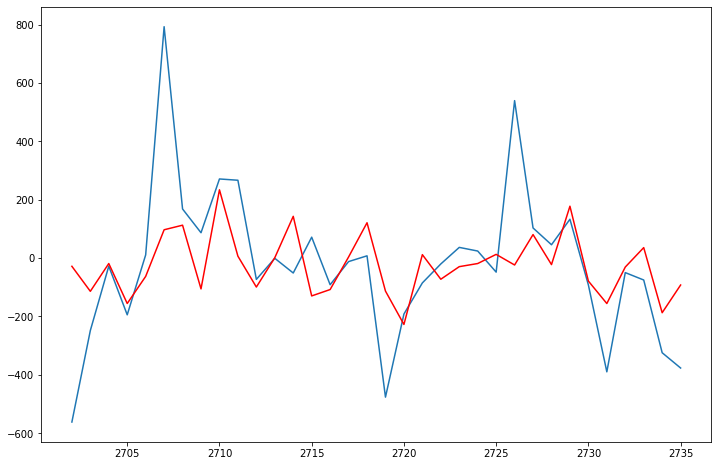

In [9]:
#Apply ARIMA to predict on data after removing trend and seasonality

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(residual[~np.isnan(residual)], order=(2, 0, 3))  
dept_dataframe_Recetpts = model.fit(disp=-1) 

plt.plot(residual[~np.isnan(residual)])
plt.plot(dept_dataframe_Recetpts.fittedvalues, color='red')
